






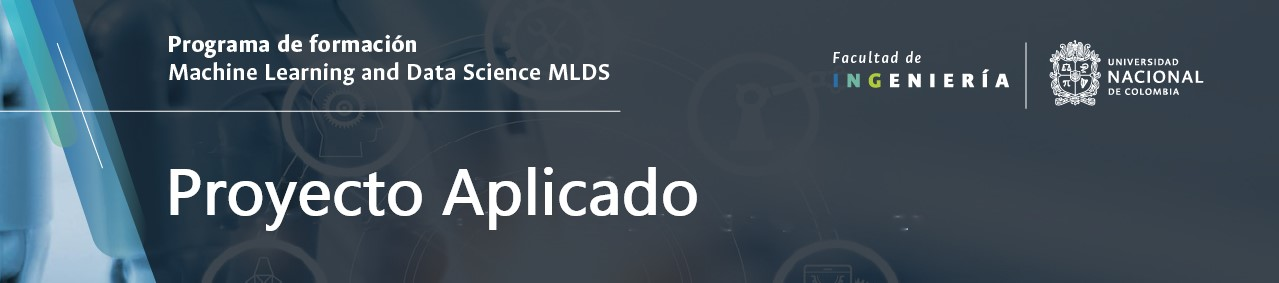

**Importar *librerías* a utilizar**

In [ ]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [ ]:
!python --version
print('Pandas', pd.__version__)
print('NumPy', np.__version__)
print('Matplotlib', mpl.__version__)
print('missingno', msno.__version__)

Python 3.10.11
Pandas 1.5.3
NumPy 1.22.4
Matplotlib 3.7.1
missingno 0.5.2


Este material fue realizado con las siguientes versiones:

- Python: 3.10.11
- pandas: 1.5.3
- NumPy: 1.22.4
- Matplotlib: 3.7.1
- Missingno: 0.5.2

# **Entendimiento y Preparación de los Datos**
---


## **1. Análisis Exploratorio de los Datos**
---

| Variable | Definición	| Valores |
| --- | --- | --- |
| Soc. | 	Sociedad  |'BP01','BP20,'BP30','BP40',BP50','BPCL' 	 |
| Centro 	| Centro de Distribución |No aplica |
| Material 	| Código de sku 	|Númerico |
| Desc. Mat. |	Descripción de Sku 	|No aplica |
| Grup. Arti |	Grupo de artículos 	|No aplica |
| Desc.Grup.Art |	Descripción grupo de artículos 	|No aplica |
| Cl.Aprovis |	Clase de aprovisionamiento 	|No aplica |
| De.Cl.Prod |	Descripción clase de producto	|No aplica |
| O.C / Pron |	Clasificación MTS - MTO |No aplica |
| Planificad 	| Planeador |No aplica |
| Desc.Gr.Co. |	Descripción grupo de compras	| No aplica |
| Lider Prod |	Ingeniero Líder de producto |	No aplica |
| Nombre R.C |	Responsable Comercial	| No aplica |
| Nomb R.CX |	Responsable Comercio Exterior |	No aplica |
| Durac.Cons |	Vida útil |	Númerico |
| Plazo Dias |	Tiempo de entrega	| Númerico |
| TpoReaprov |	Tiempo de fabricación |	Númerico |
| Cl.Apr.Esp |	Clase de aprovisionamiento especial |	'E','F','X' |
| Punto Pedi |	Punto de pedido	| Númerico |
| Stock Seg. |	Stock de seguridad |	Númerico |
| TamLoteMin |	Tamaño de lote mínimo |	Númerico |
| Vr Redond. |	Valor de redondeo	| Númerico |
| Jer Pro N1 |	Jerarquía de producto # 1 |	No aplica |
| Descri. J1 |	Descripción jerarquía de producto # 1 |	No aplica |
| Jer Pro N2 |	Jerarquía de producto # 2 |	No aplica |
| Descri. J2 |	Descripción jerarquía de producto # 2 |	No aplica |
| Jer Pro N3 |	Jerarquía de producto # 3 |	No aplica |
| Descri. J3 |	Descripción jerarquía de producto # 3 |	No aplica |
| Jer Pro N4 |	Jerarquía de producto # 4 |	No aplica |
| Descri. J4 |	Descripción jerarquía de producto # 4 |	No aplica |
| JerqProve1 |	Jerarquía de proveedor # 1 |	No aplica |
| DescJerqP1 |	Descripción de proveedor # 1 |	No aplica |
| JerqProve2 |	Jerarquía de proveedor # 2 |	No aplica |
| DescJerqP2 |	Descripción de proveedor # 2 |	No aplica |
| JerqProve3 |	Jerarquía de proveedor # 3 |	No aplica |
| DescJerqP3 |	Descripción de proveedor # 3 |	No aplica |
| JerqProve4 |	Jerarquía de proveedor # 4 |	No aplica |
| DescJerqP4 |	Descripción de proveedor # 4 |	No aplica |
| Status Mat |	Estado del material |	Númerico |
| Consolid|	Días de consolidación |	Númerico |
| Negoci |	Días de negociación |	Númerico |
| Envio O.C |	Días envío orden de compra |	Númerico |
| Alis/Desp |	Días de alistamiento o despacho |	Númerico |
| Tran Inter |	Días de tránsito Internacional |	Númerico |
| TpTrEnMciD |	Tiempo de tratamiento de mercancías |	Númerico |
| Desaduanaj |	Desaduanaje o nacionalización |	Númerico |
| Traslado |	Dias de traslado |	Númerico |
| No Previst |	Días no previstos de LT |	Númerico |

In [ ]:
# Cargamos el archivo que contiene la información.

df = pd.read_excel('sample_data/KE30.xlsx',usecols=range(11))

### **1.1. Resumen General**
---

- ¿Cuántos documentos tiene el dataset?

In [ ]:
# Identificamos la cantidad de registros con los que contamos.

df.size

2764135

- ¿En qué formato están guartdados los datos?

El conjunto de datos es de una base de datos del ERP de la compañía SAP R3.

- ¿Qué tamaño en MB tiene el conjunto?

In [ ]:
# Ruta del archivo
archivo = 'sample_data/KE30.xlsx'

# Tamaño del archivo en bytes
peso = os.path.getsize(archivo)

# Convertir el tamaño a megabytes
peso_mb = round(peso / (1024*1024),2)

print("El peso del archivo es:", peso_mb, "MB")

El peso del archivo es: 13.88 MB


- ¿Tenemos valores faltantes?

In [ ]:
#Obtenemos información sobre el dataset para visualizar si tenemos registros faltantes o campos faltantes.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251285 entries, 0 to 251284
Data columns (total 11 columns):
 #   Column                                                                                                Non-Null Count   Dtype 
---  ------                                                                                                --------------   ----- 
 0   03.05.2023                             Salida dinámica de lista                                    1  13 non-null      object
 1   Unnamed: 1                                                                                            251128 non-null  object
 2   Unnamed: 2                                                                                            251264 non-null  object
 3   Unnamed: 3                                                                                            9 non-null       object
 4   Unnamed: 4                                                                                        

### **1.2. Resumen de la Calidad de los datos**
---

- ¿Hay datos faltantes, documentos vacíos o de mala calidad?

   Si, el conjunto de datos tiene valores faltantes por lo que debemos realizar un preprocesamiento para limpiar lo datos.

- ¿Existen documentos ilegibles o con problemas de codificación?

  No.

- ¿Hay mezcla de formatos en el conjunto?

  No.

In [ ]:
df.head()

,03.05.2023 Salida dinámica de lista 1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Artículo,NaN,NaN,1 15000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sociedad,NaN,NaN,BP01 BPCL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sociedad CO,NaN,NaN,BP01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tipo de moneda,NaN,NaN,B0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Identificamos cuántas filas y columnas tiene el dataset.

df.shape

(251285, 11)

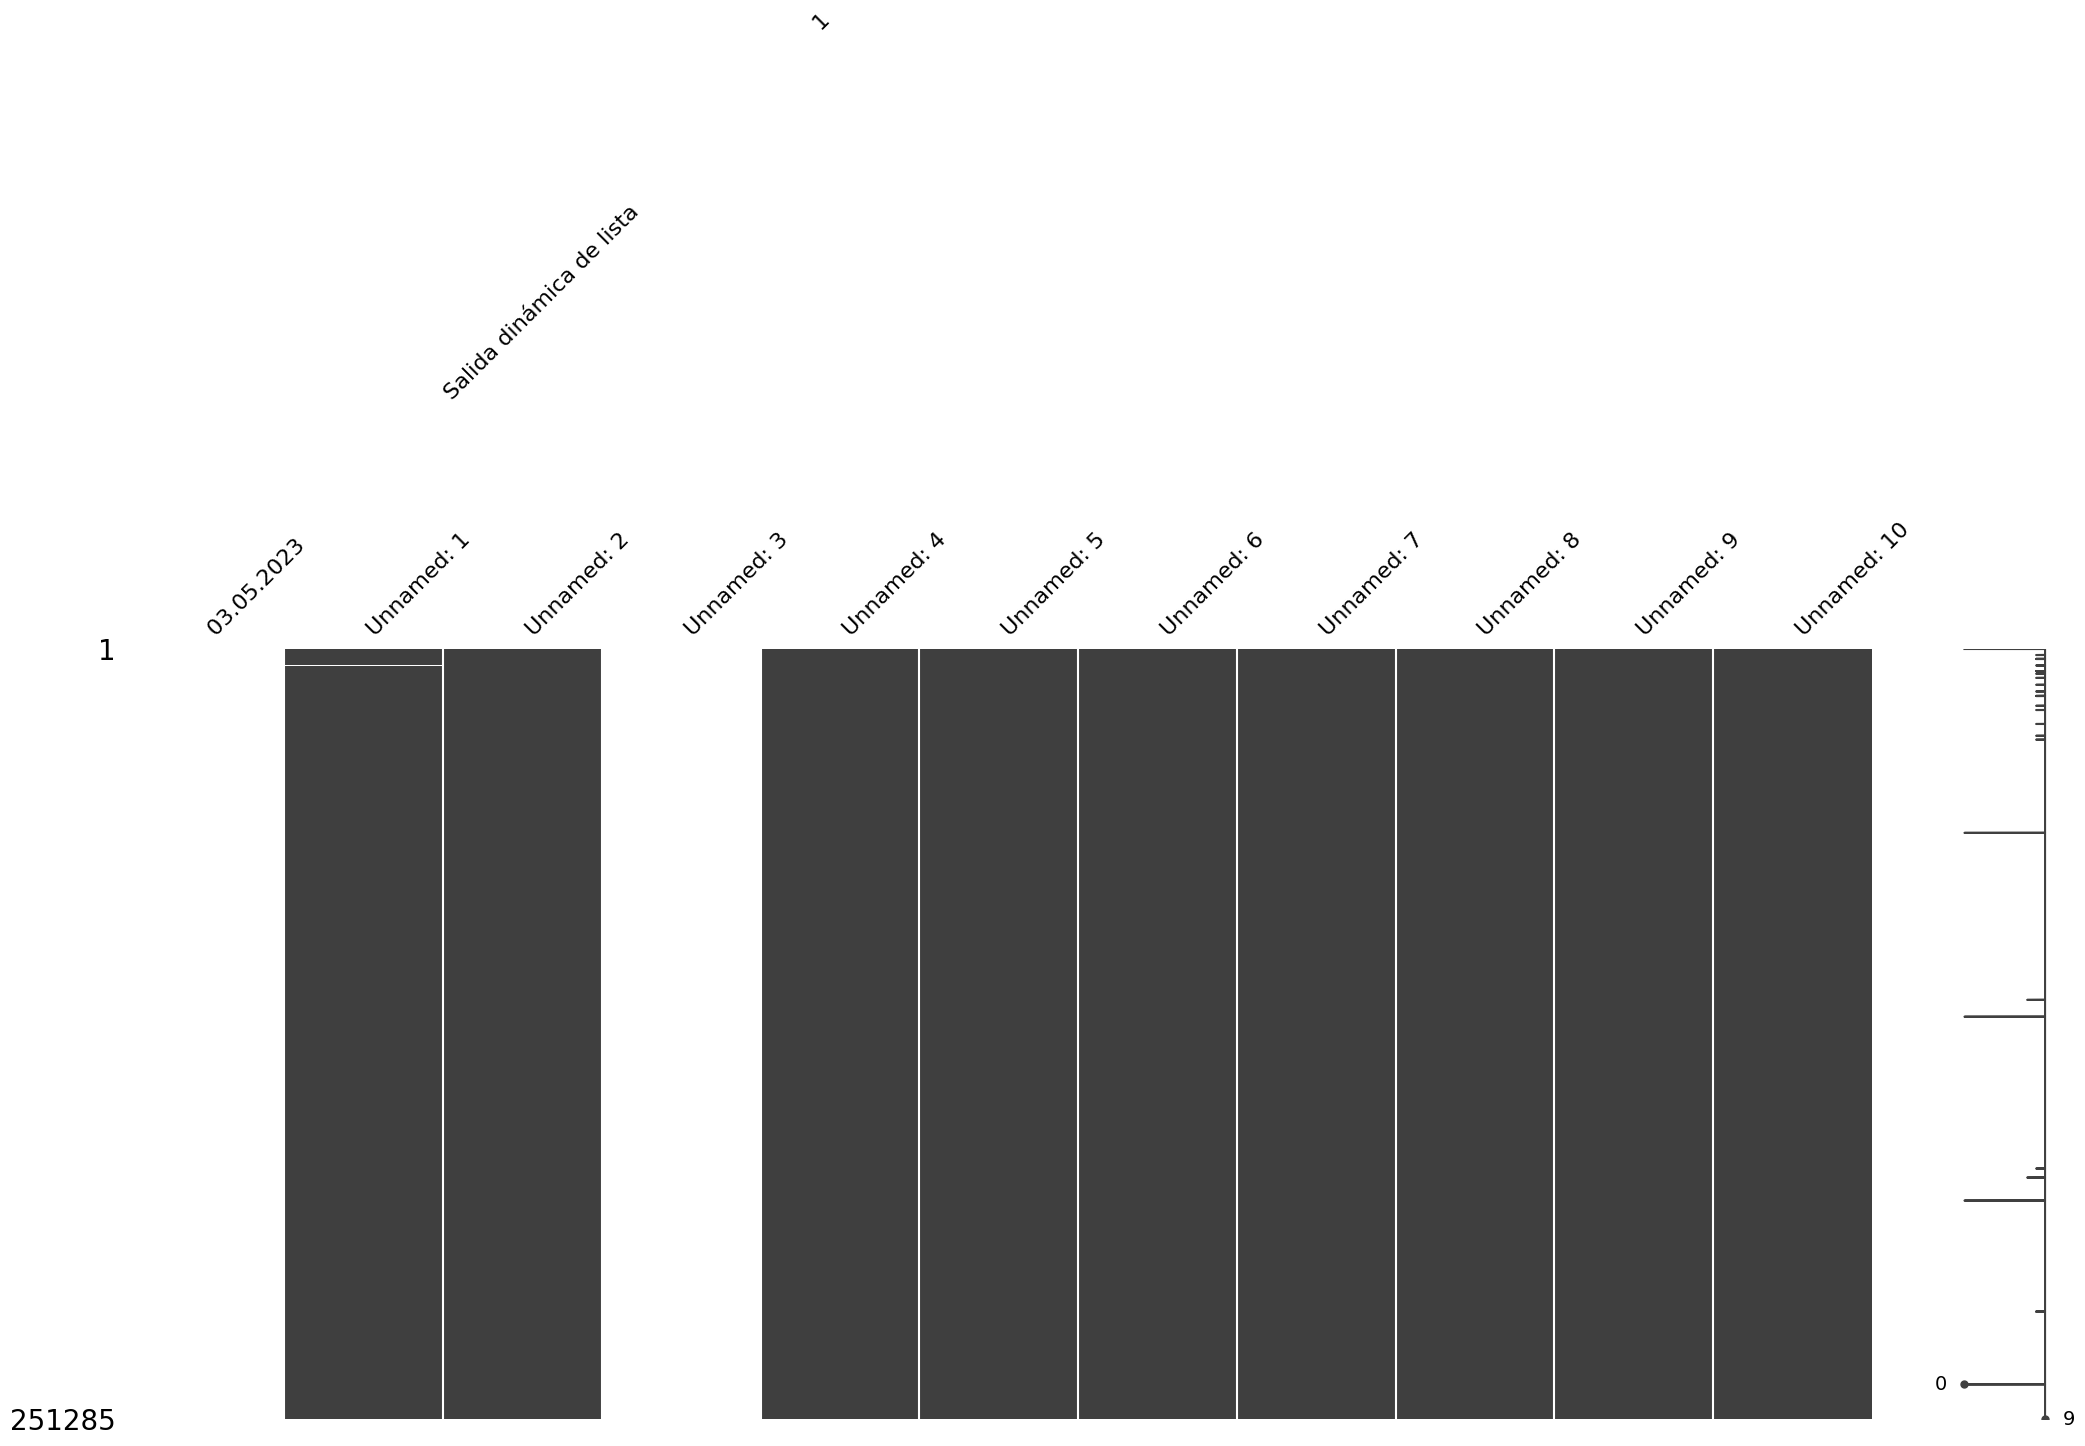

In [ ]:
#Revisamos visualmente la completitud del dataset.

msno.matrix(df);

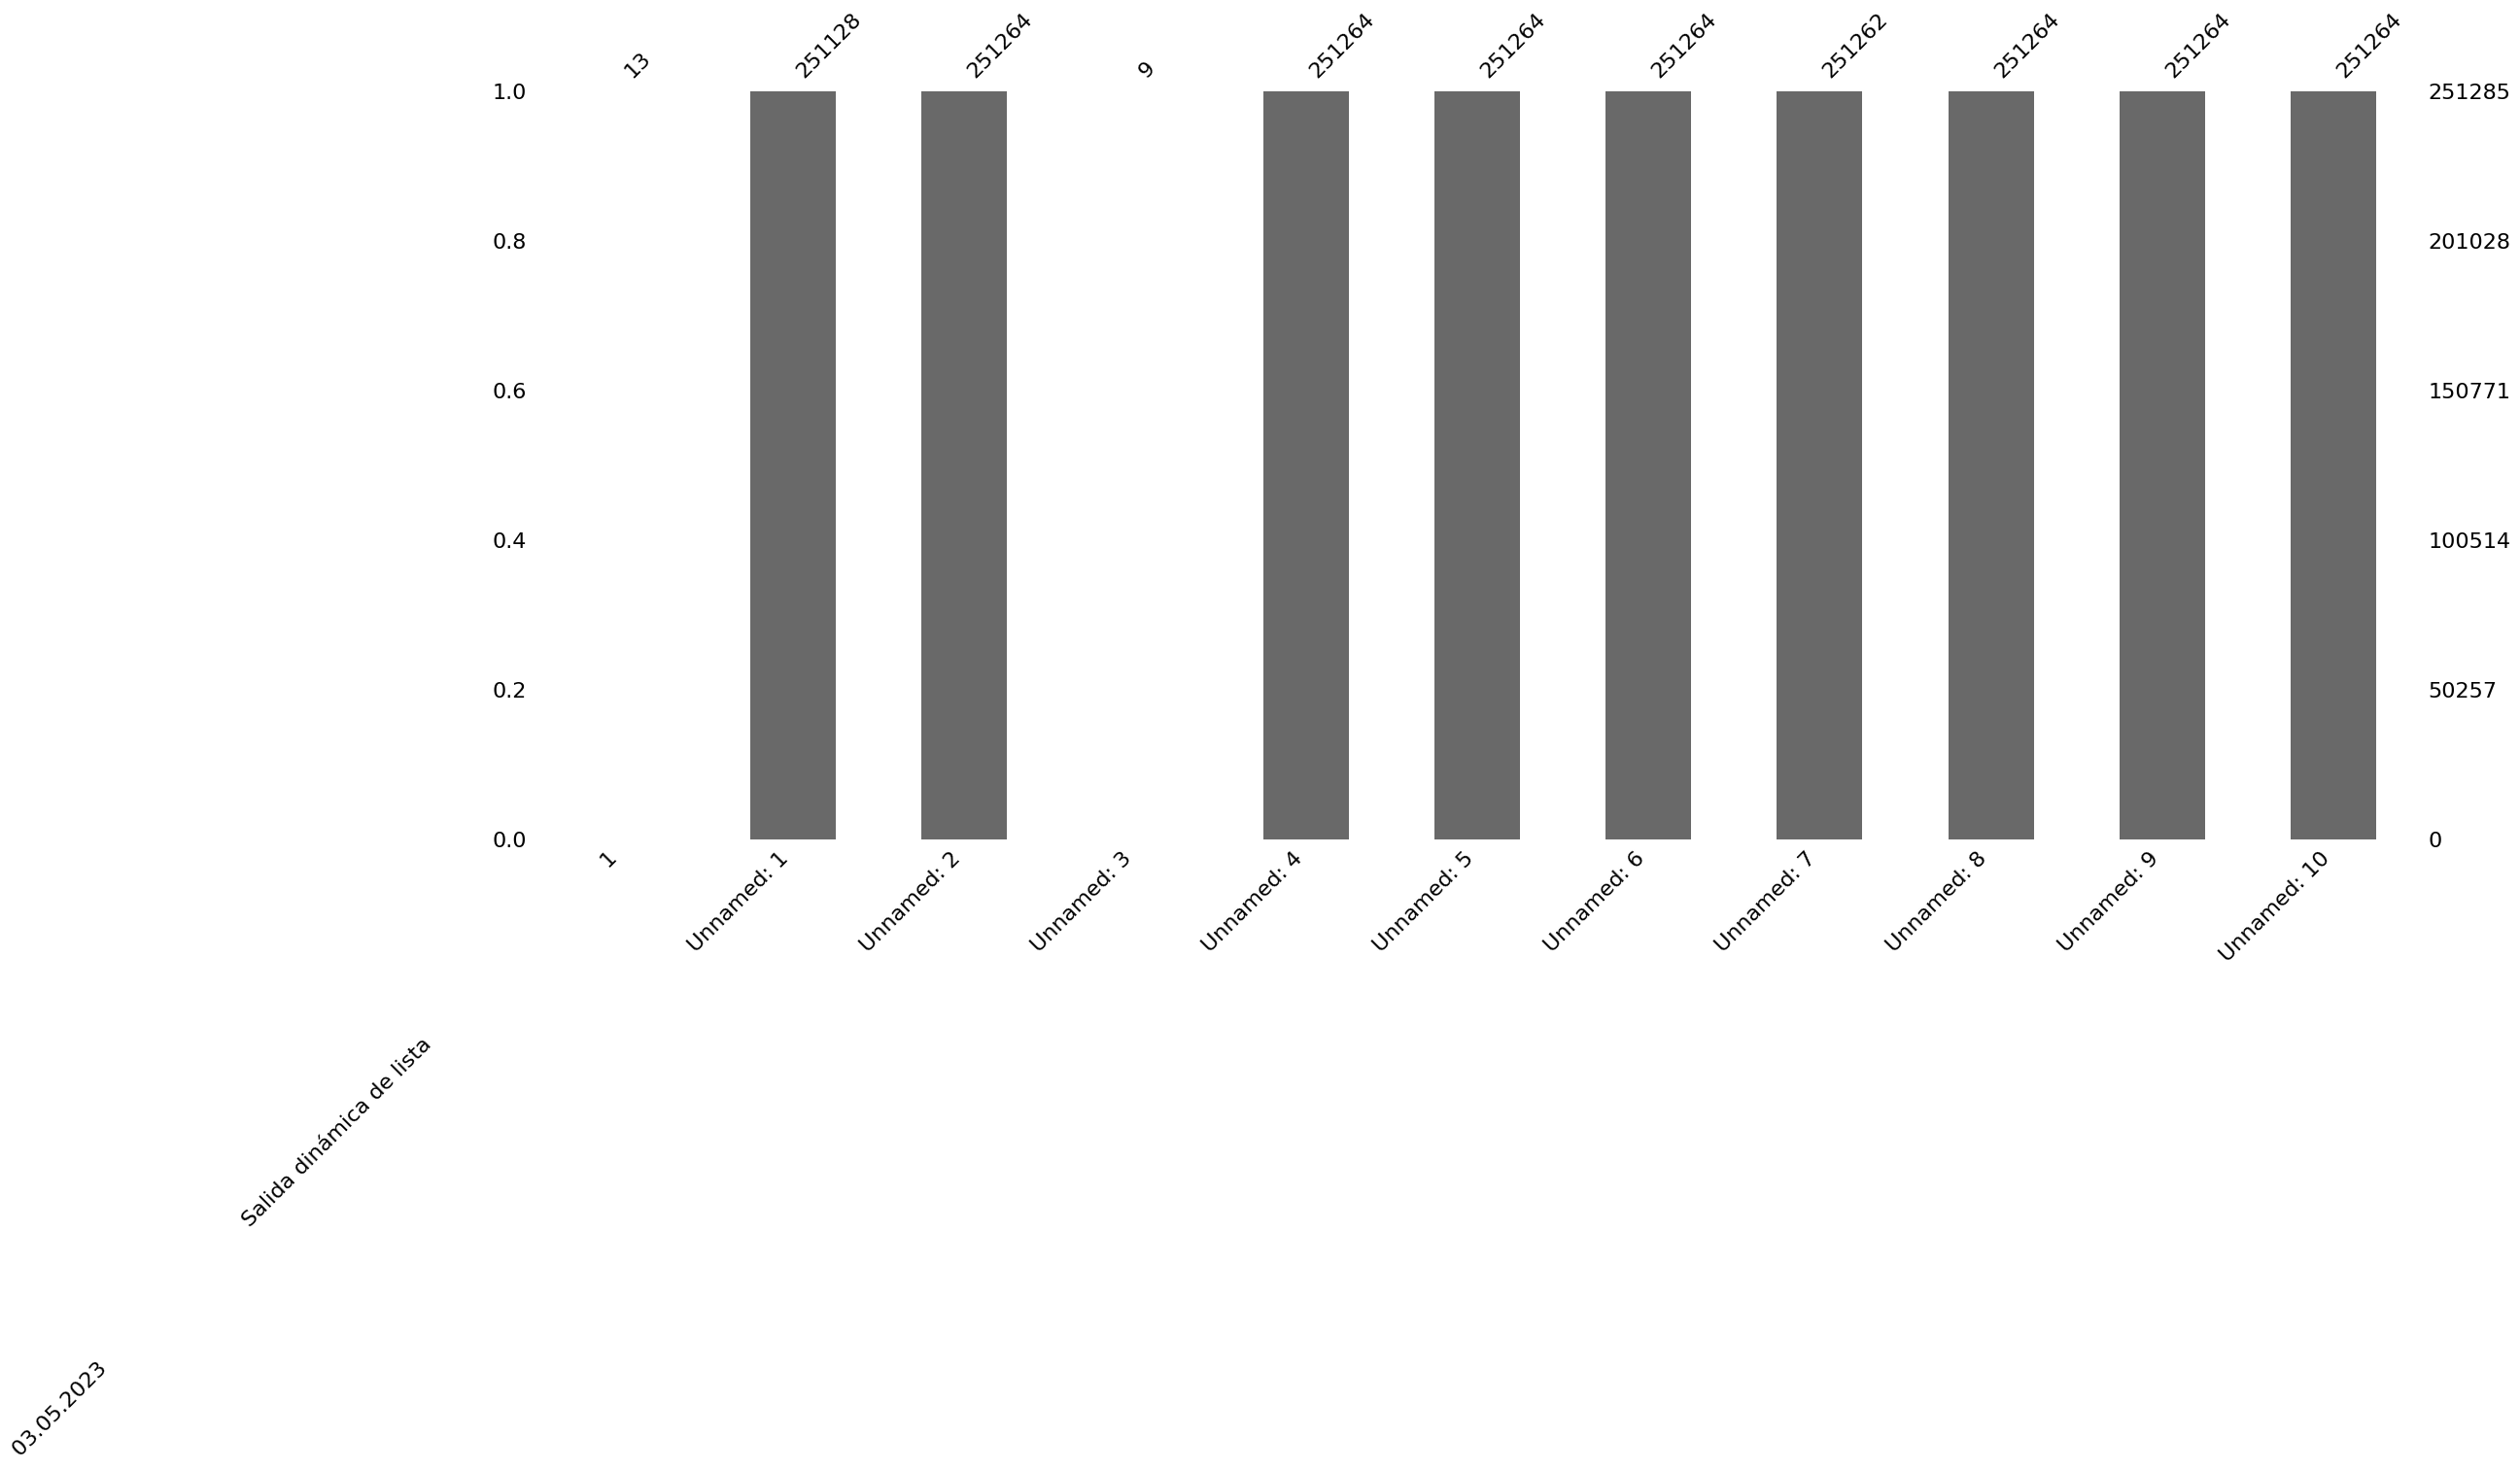

In [ ]:
#Verificamos cuales son las principales variables que tienen mayor valores faltantes.

msno.bar(df);

In [ ]:
#Cuantificamos la cantidad de datos faltantes que tenemos por variable:

df.isna().sum()

03.05.2023                             Salida dinámica de lista                                    1    251272
Unnamed: 1                                                                                                 157
Unnamed: 2                                                                                                  21
Unnamed: 3                                                                                              251276
Unnamed: 4                                                                                                  21
Unnamed: 5                                                                                                  21
Unnamed: 6                                                                                                  21
Unnamed: 7                                                                                                  23
Unnamed: 8                                                                                                  21
U

### **1.3. Tipos de variables**
---

- ¿El conjunto de datos tiene una variable objetivo a estimar?, de ser así, ¿es una variable continúa o categórica?

  El conjunto de datos cuenta l conjunto de datos cuenta con etiquetas continuas.

- ¿El conjunto de datos cuenta con otras variables adicionales?, de ser así, debe analizar cuáles se incorporarán en el modelo y hacer un análisis descriptivo de las mismas.

  No cuenta con variables adicionales, sin embargo pretendemos incluir los precios de los productos para integrarlo cómo variable, ya que está correlacionado al comportamiento de la demanda.